### Sentiment Analysis - Unsupervised Data

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
imdb = pd.read_csv('E:/Term3/Unstructured/imdb_sentiment.csv')
imdb.head(2)

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0


### VADER
Valence Aware Dictionary and sEentiment Reasoner

    -sentence polarity = No.of.Positive words - No.of.Negative words ( In that sentence) 
    -->In Traditional methods , +ve is 1 and -ve is 0 

In [3]:
sentiment = SentimentIntensityAnalyzer()
sentiment.polarity_scores('I Love India')
# Returns % of positive score,% of negative score and % of neutral
# compound >0 +ve score , < 0 -ve ,~0 neutral ( between -1 to 1)


{'compound': 0.6369, 'neg': 0.0, 'neu': 0.192, 'pos': 0.808}

In [4]:
sentiment.polarity_scores('I Love India I hate apple')

{'compound': 0.128, 'neg': 0.374, 'neu': 0.202, 'pos': 0.424}

In [5]:
def get_sentiment(text):
    sentiment = SentimentIntensityAnalyzer()
    compound = sentiment.polarity_scores(text)['compound']
    if compound > 0:
        return 1
    else:
        return 0
    
imdb['sentiment_vader'] = imdb['review'].apply(get_sentiment)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(imdb['sentiment'],imdb['sentiment_vader'])
#

0.7941176470588235

### Word Similarity

In [7]:
amazon = pd.read_csv('E:/Term3/Unstructured/amazon_reviews.csv')
amazon.shape

(999, 10)

In [8]:
amazon.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09


In [9]:
docs = amazon['reviewText'].fillna('').str.lower().str.replace('[^a-z ]','')
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

0    got gp husband otr road trucker  impress ship ...
1    im profession otr truck driver bought tnd  tru...
2    well say  ive unit truck four day  prior garmi...
3    go write long review even thought unit deserv ...
4    ive mine year here got tri rout non truck rout...
Name: reviewText, dtype: object

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(docs_clean)
df_dtm = pd.DataFrame(vectorizer.transform(docs_clean).toarray(),columns=vectorizer.get_feature_names())
df_dtm.shape

(999, 7172)

In [11]:
# Cosine similarity between 2 words(vectors)
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([df_dtm['tablet'],df_dtm['ipad']])

array([[1.        , 0.35781834],
       [0.35781834, 1.        ]])

In [22]:
sim_mat = cosine_similarity(df_dtm.T) # If not transposed , will give document similarity
sim_mat = pd.DataFrame(sim_mat,columns=df_dtm.columns,index=df_dtm.columns)
sim_mat.head(5)
#Symantec analysis
#sim_mat['tablet'].sort_values(ascending = False)

,aaa,aac,abandon,abil,abl,abnorm,aboutdo,aboutif,absenc,absent,...,zbox,zero,zillion,zip,zipper,zippi,zippier,zirco,zoom,zune
aaa,1.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
aac,0.0,1.000000,0.0,0.100504,0.00000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
abandon,0.0,0.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
abil,0.0,0.100504,0.0,1.000000,0.20324,0.100504,0.000000,0.0,0.0,0.201008,...,0.0,0.000000,0.000000,0.116052,0.0,0.000000,0.201008,0.0,0.252714,0.071067
abl,0.0,0.000000,0.0,0.203240,1.00000,0.065233,0.195698,0.0,0.0,0.065233,...,0.0,0.106525,0.065233,0.037662,0.0,0.130466,0.260931,0.0,0.257755,0.000000


In [20]:
# writing a function to get the similar words of  a  given word.

def get_similar_words(input_word,sim_mat):  
    cos_vals = sim_mat[input_word].sort_values(ascending = False) # we can drop the similar words
    similar_words = cos_vals.drop(input_word).head(5)
    return similar_words

In [21]:
get_similar_words('app',sim_mat)

tablet        0.625789
android       0.555623
marketplac    0.536400
bird          0.532974
doesnt        0.508315
Name: app, dtype: float64

##### Topic Modelling and Text Summarization

### TOPIC MODELLING

- Tag the data , Multiple tagging.Similar to clustering but has more advantages.
- ### Popular Methods
- Latent Dirichlet Allocation (LDA) widely used
- Latent Sematic Analysis

In [23]:
!pip install gensim

  Stored in directory: C:\Users\venkat\AppData\Local\pip\Cache\wheels\f7\a6\ff\9ab5842c14e50e95a06a4675b0b4a689c9cab6064dac2b01d0
  Stored in directory: C:\Users\venkat\AppData\Local\pip\Cache\wheels\81\75\d6\e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [1]:
import gensim


- Gensim doesnt store all the 0s in DTM (memory ineffecient), instead it stores the non zero values as a list .
- (inside ,a list for each document)
- bag of words at document level
- List for a corpus , inside the list number of lists is number of rows(documents),every tuple in a list consists of unique 
  terms and the frequency of each term.

In [28]:
amazon = pd.read_csv('E:/Term3/Unstructured/amazon_reviews_big.csv')
amazon.shape

(100000, 8)

In [42]:
docs_clean =[]
docs = amazon['reviewText'].fillna('').str.lower().str.replace('[^a-z ]','')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['','use','good','like','great','work','one'])
stemmer = nltk.stem.PorterStemmer()

for doc in docs:
    words = doc.split(' ')
    words_clean = [stemmer.stem(word) for word in words if stemmer.stem(word) not in stopwords]
    docs_clean.append(words_clean)
len(docs_clean)

100000

In [43]:
# Create ID's to each word in docs_clean
dictionary = gensim.corpora.Dictionary(docs_clean)
dictionary

In [ ]:
#list(zip(dictionary.keys(),dictionary.values()))

In [44]:
docs_bow =[]
for doc in docs_clean:
    doc_bow = dictionary.doc2bow(doc) #Takes 1 document at a time and identifies its frequency along with its ID(from dictionary)
    docs_bow.append(doc_bow)

In [45]:
dictionary.doc2bow(docs_clean[0])

[(0, 1),
 (1, 2),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 5),
 (8, 1),
 (9, 1),
 (10, 3),
 (11, 2),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 2),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 2),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 2),
 (35, 2),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1)]

In [46]:
lda_model = gensim.models.LdaModel(docs_bow,id2word = dictionary,num_topics=6) # Id mapped to each word , printing the each
# word id2word is used.

In [47]:
lda_model.get_document_topics(docs_bow[0]) #This is relation between Topic and documents

[(1, 0.98624134)]

In [48]:
# Now relation between Topics and words
lda_model.print_topics()

[(0,
  '0.016*"case" + 0.008*"fit" + 0.007*"sound" + 0.007*"well" + 0.007*"get" + 0.007*"look" + 0.007*"use" + 0.007*"would" + 0.006*"headphon" + 0.006*"realli"'),
 (1,
  '0.015*"cabl" + 0.015*"sound" + 0.013*"speaker" + 0.013*"tv" + 0.012*"work" + 0.010*"price" + 0.009*"product" + 0.009*"qualiti" + 0.008*"would" + 0.008*"get"'),
 (2,
  '0.013*"pictur" + 0.011*"video" + 0.010*"set" + 0.009*"screen" + 0.008*"get" + 0.007*"featur" + 0.007*"qualiti" + 0.007*"monitor" + 0.007*"record" + 0.006*"look"'),
 (3,
  '0.049*"camera" + 0.025*"len" + 0.011*"canon" + 0.010*"mm" + 0.010*"bag" + 0.009*"use" + 0.008*"take" + 0.008*"shoot" + 0.007*"flash" + 0.007*"light"'),
 (4,
  '0.031*"batteri" + 0.021*"charg" + 0.016*"work" + 0.015*"connect" + 0.014*"mous" + 0.014*"cabl" + 0.013*"router" + 0.012*"devic" + 0.012*"wireless" + 0.011*"use"'),
 (5,
  '0.015*"drive" + 0.010*"card" + 0.008*"use" + 0.008*"comput" + 0.008*"usb" + 0.008*"work" + 0.006*"get" + 0.006*"devic" + 0.006*"instal" + 0.006*"need"')]

In [54]:
## Once the model we build is good enough , we will go for tagging
doc2topic_prob =pd.DataFrame(lda_model.get_document_topics(docs_bow[0]),columns = ['topic','prob'])
doc2topic_prob.sort_values('prob',ascending = False).iloc[0]['topic']

1.0

In [58]:
topics = []
for doc_bow in docs_bow:
    doc2topic_prob = lda_model.get_document_topics(doc_bow)
    doc2topic_prob = pd.DataFrame(doc2topic_prob,
                                 columns=['topic','prob'])
    topic = doc2topic_prob.sort_values('prob',
                                      ascending=False).iloc[0]['topic']
    topics.append(topic)

In [57]:
# Repeat for all the documents

#topics = []
#for doc_bow in docs_bow:
#    doc2topic_prob = lda_model.get_document_topics(docs_bow)
#    doc2topic_prob =pd.DataFrame(doc2topic_prob,columns = ['topic','prob'])
#    topic = doc2topic_prob.sort_values('prob',ascending = False).iloc[0]['topic']
#    topics.append(topic)

ValueError: DataFrame constructor not properly called!

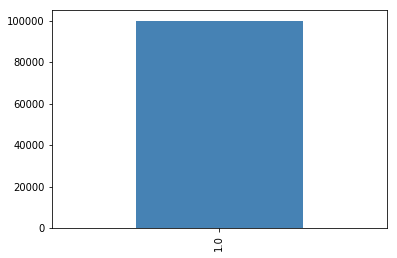

In [52]:
%matplotlib inline
amazon['topics'] = topics
amazon['topics'].value_counts().plot.bar(color = 'steelblue')

#### ----------------------------------------------------------------------- EXERCISE--------------------------------------

### Sentiment Analysis
 - Use hotstar data,predict sentiment score for the reviews column using vader package 
 - Convert score to labels:
     - Positive(score > 0.05)
     - Negative(score <-0.05)
     - Neutral(-0.05 <=score<=0.05)
 - calculate accuracy score 
 - Compare the accuracy with supervised models and comment whether supervised or unsupervised gives best accuracy.
 - Create a multi line chart for comparing no.of.positive,negative and neutral reviews for each day ( we have one week data)

In [3]:
hs = pd.read_csv('E:/Term3/Unstructured/hotstar.allreviews_Sentiments.csv')
hs.head(5)

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral


In [6]:
def get_sentiment(text):
    sentiment = SentimentIntensityAnalyzer()
    compound = sentiment.polarity_scores(text)['compound']
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
hs['sentiment_vader'] = hs['Reviews'].apply(get_sentiment)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(hs['Sentiment_Manual'],hs['sentiment_vader'])

0.5503661191371463